<a href="https://colab.research.google.com/github/arhamJain29/ImageInsight-AI/blob/main/ImageInsight_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
!pip install tensorflow opencv-python matplotlib

In [80]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.7.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.16.0.

In [81]:
import tensorflow as tf
import os

In [82]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.18.0
Num GPUs Available: 0


In [83]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# kitne GPUs hai available Detect krna
# memory ko allocate karna during training

In [84]:
tf.config.list_physical_devices('GPU')


[]

In [85]:
import cv2
import imghdr # batata hai type of img file

In [9]:
data_dir = 'data'

In [86]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [87]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


#check krna ki Img file is correct or not and delete krna if found incorrect


In [88]:
import numpy as np
from matplotlib import pyplot as plt

In [89]:
data = tf.keras.utils.image_dataset_from_directory('data')

# saari images ko read krra h under data , unke labels assign krta h & batches mea divide krta h of 32

Found 175 files belonging to 2 classes.


In [90]:
data_iterator = data.as_numpy_iterator()

#convert krta h data ko numpystyle iterator mea jo enable us to loop through it

In [91]:
batch = data_iterator.next()

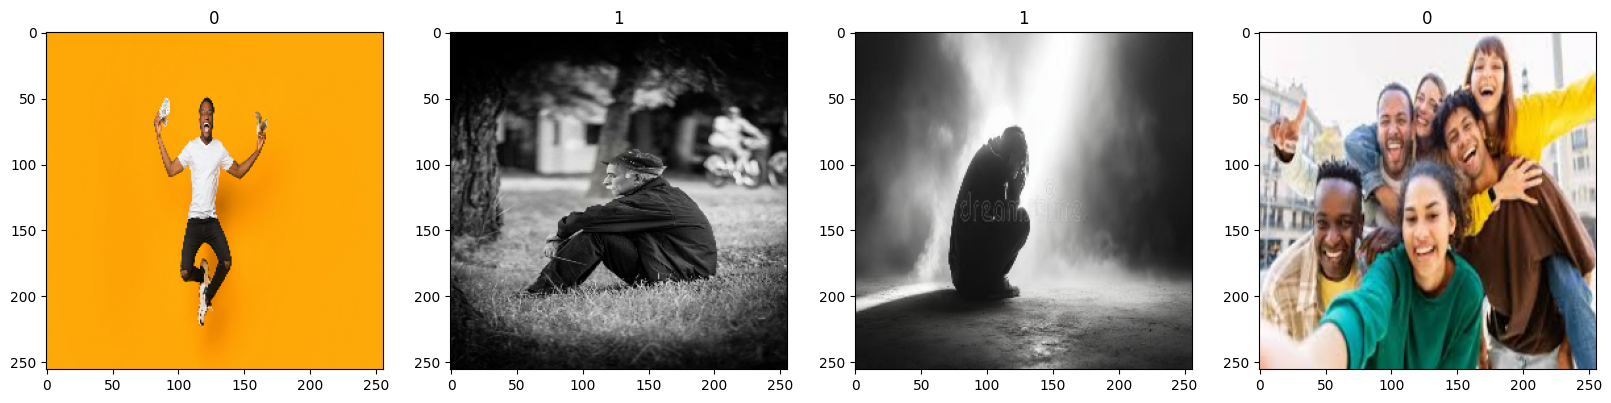

In [92]:
fig, ax = plt.subplots(ncols =4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


# plot krta hai first 4 img along with assigned labels

In [93]:
data = data.map(lambda x,y: (x/255, y))

#normalize krna image pixel ko in range (0,1)

In [94]:
data.as_numpy_iterator().next()

(array([[[[0.18696384, 0.46931678, 0.85363054],
          [0.19215687, 0.4745098 , 0.85882354],
          [0.19215687, 0.4745098 , 0.85882354],
          ...,
          [0.2       , 0.46666667, 0.84705883],
          [0.20384471, 0.47051138, 0.8509036 ],
          [0.20392157, 0.47058824, 0.8509804 ]],
 
         [[0.18696384, 0.46931678, 0.85363054],
          [0.19215687, 0.4745098 , 0.85882354],
          [0.19215687, 0.4745098 , 0.85882354],
          ...,
          [0.2       , 0.46666667, 0.84705883],
          [0.20392157, 0.47058824, 0.8509804 ],
          [0.20392157, 0.47058824, 0.8509804 ]],
 
         [[0.18696384, 0.46931678, 0.85363054],
          [0.19215687, 0.4745098 , 0.85882354],
          [0.19215687, 0.4745098 , 0.85882354],
          ...,
          [0.20305382, 0.46972048, 0.8501126 ],
          [0.20392157, 0.47058824, 0.8509804 ],
          [0.20392157, 0.47058824, 0.8509804 ]],
 
         ...,
 
         [[0.45983368, 0.4820457 , 0.18343294],
          [0.48645

In [95]:
len(data)

6

In [129]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

#assign krna train test val splits 70% 10% 20%

In [130]:
test_size

1

In [131]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

len(train), len(val), len(test)

(4, 1, 1)

In [132]:
len(test)

1

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


#Sequential model ki API ko import krna fir import krna layer classes for nueral network

In [134]:
model = Sequential()

In [135]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


#CNN model hai binary img classification krne ke Liye

In [136]:
model.compile('adam', loss= tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

#adam optimize ko use kiye h for weightes updating

In [137]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [139]:
logdir= 'logs'

In [140]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

#help krta h monitor krne mea training val ka loss/acc

In [141]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


#store krta h training history in hist for analysis and plotting

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6708 - loss: 1.5701 - val_accuracy: 0.2500 - val_loss: 1.6847
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4146 - loss: 1.1149 - val_accuracy: 0.6250 - val_loss: 0.6327
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5719 - loss: 0.6419 - val_accuracy: 0.6562 - val_loss: 0.5854
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6448 - loss: 0.5892 - val_accuracy: 0.5312 - val_loss: 0.6460
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.6448 - loss: 0.6036 - val_accuracy: 0.7812 - val_loss: 0.5642
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7698 - loss: 0.5163 - val_accuracy: 0.7500 - val_loss: 0.4109
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7615 - loss: 0.4238 - val_accuracy: 0.7500 - val_loss: 0.4720
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8771 - loss: 0.3515 - val_accuracy: 0.7500 - val_loss: 0.4865
Epoch 9/

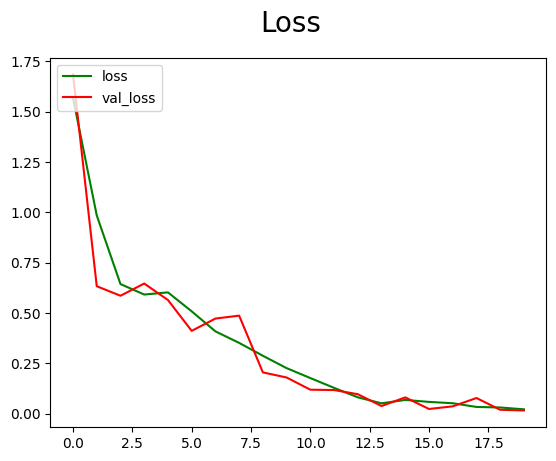

In [142]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

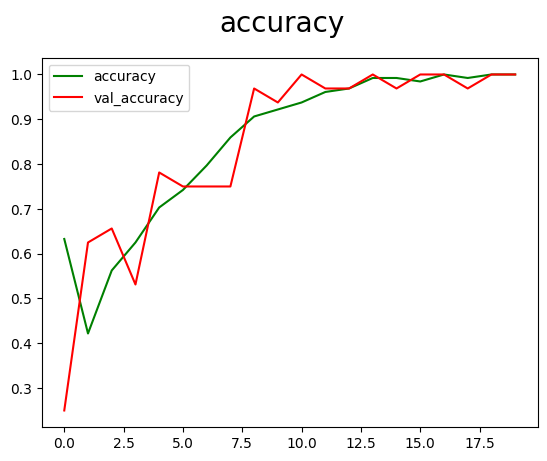

In [143]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [144]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# import krna diff metrices for evaluation

In [145]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [146]:
len(test)

1

In [147]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

#calc krna different metrices on test data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


In [148]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 1.0, Recall:1.0, Accuracy:1.0


In [150]:
import cv2


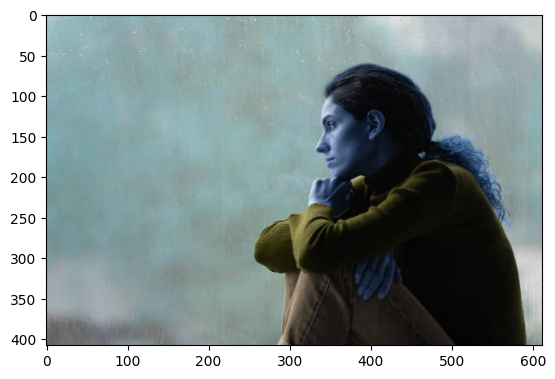

In [160]:
img = cv2.imread('/content/sad2.jpg')
plt.imshow(img)
plt.show()

#new img data ko plot krra h

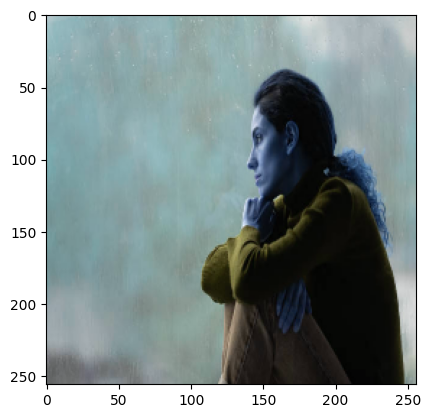

In [161]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


# resize krna new img ko acc to our model

In [162]:
yhat = model.predict(np.expand_dims(resize/255, 0))

#scale krna new img ko for testing so that it could be in range 0-1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [163]:
yhat

array([[0.9845776]], dtype=float32)

In [164]:
if yhat > 0.5:
    print(f'Predicted Sad')
else:
    print(f'Predicted Happy')

Predicted Sad


In [165]:
from tensorflow.keras.models import load_model


In [157]:
model.save(os.path.join('models','imageclassifier.h5'))
